<a href="https://colab.research.google.com/github/Andre647/Ciencia_de_Dados/blob/main/IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Datasets

In [2]:
t_basic = pd.read_csv('/content/title_basics.tsv', sep = '	',index_col = 0)
t_crew = pd.read_csv('/content/title_crew.tsv', sep = '	',index_col = 0)
t_ratings = pd.read_csv('/content/title_ratings.tsv', sep = '	',index_col = 0)
name_basics = pd.read_csv('/content/name_basics.tsv', sep = '	',index_col = 0)

<ipython-input-2-50203eb07101>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  t_basic = pd.read_csv('/content/title_basics.tsv', sep = '	',index_col = 0)


In [3]:
t_basic.head()
#t_crew.head()
#t_ratings.head()
#name_basics.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


#Limpeza dataset t_basic

In [4]:
  # separa o genero em 3 colunas
t_basic[['genre1', 'genre2', 'genre3']] = t_basic['genres'].str.split(',', expand=True)  
  
  # colunas não usadas
t_basic = t_basic.drop(['originalTitle','genres','isAdult','endYear','runtimeMinutes'],axis = 1)  
  
  # apaga valores que não serão usados
cortados = t_basic['titleType'].isin(['short','tvShort','tvEpisode','tvMiniSeries','tvSpecial','video','videoGame','nan'])
t_basic = t_basic.drop(t_basic[cortados].index)



  # apaga valores nulos na coluna de genero
limpeza = t_basic['genre1'].isin(['\\N'])
t_basic = t_basic.drop(t_basic[limpeza].index)

 # adiciona as notas aos filmes
t_basic = pd.merge(t_basic, t_ratings, on='tconst', how='left')

 # transforma ano em numerico
t_basic['startYear'] = pd.to_numeric(t_basic['startYear'], errors='coerce')


In [5]:
t_basic = t_basic.drop(t_basic[t_basic['numVotes'] < 100000].index)
t_basic = t_basic.dropna(subset=['numVotes'])

In [6]:
t_basic.head()

,titleType,primaryTitle,startYear,genre1,genre2,genre3,averageRating,numVotes
tconst,,,,,,,,
tt0012349,movie,The Kid,1921.0,Comedy,Drama,Family,8.3,128899.0
tt0013442,movie,Nosferatu,1922.0,Fantasy,Horror,None,7.9,100415.0
tt0015864,movie,The Gold Rush,1925.0,Adventure,Comedy,Drama,8.1,113525.0
tt0017136,movie,Metropolis,1927.0,Drama,Sci-Fi,None,8.3,177711.0
tt0021749,movie,City Lights,1931.0,Comedy,Drama,Romance,8.5,187974.0


#Funções de filtro por um genero
(consideramos no minimo 50 000 avaliações)

##Manipulando os dados

In [7]:
def concatena_generos(df, genero_especifico):
    df1 = df[(df['genre1'] == genero_especifico) & (t_basic['numVotes'] > 50000.0)]
    df2 = df[(df['genre2'] == genero_especifico) & (t_basic['numVotes'] > 50000.0)]
    df3 = df[(df['genre3'] == genero_especifico) & (t_basic['numVotes'] > 50000.0)]
    df_genero = pd.concat([df1 ,df2 ,df3 ])
    return df_genero


def controla_generos():
  coluna1 = t_basic['genre1'].unique()
  coluna2 = t_basic['genre2'].unique()
  coluna3 = t_basic['genre3'].unique()
  genero = set(np.concatenate((coluna1, coluna2, coluna3)))
  return genero

def top_genero(df, genero_especifico):
    df_genero = concatena_generos(df,genero_especifico)
    #ordena os melhores e separa os 10
    df_ordenado = df_genero.sort_values('averageRating', ascending=False)
    top_10 = df_ordenado.head(10)[['primaryTitle','averageRating']]
    return top_10

def popular_genero(df, genero_especifico):
    df_genero = concatena_generos(df,genero_especifico)
    #ordena os melhores e separa os 10
    df_ordenado = df_genero.sort_values('numVotes', ascending=False)
    top_10 = df_ordenado.head(10)[['primaryTitle','numVotes']]
    return top_10


##Exibindo os dados

In [8]:
def exibicao_melhores(df):

  #caixa de texto
  texto_digitado = input('Digite qual genênero você deseja conhecer os melhores filmes: ').capitalize()
  genero = controla_generos()
  
  if texto_digitado not in genero:
    return 0
  else:
    # grafico
    top_10_filmes = top_genero(df,texto_digitado)
    grafico = sns.barplot(x = 'averageRating',y = 'primaryTitle', palette = 'mako',data = top_10_filmes)
    #plt.xlim(8, 10)
    return grafico

def exibicao_populares(df):

  #caixa de texto
  texto_digitado = input('Digite qual genênero você deseja conhecer os filmes mais populares: ').capitalize()
  genero = controla_generos()
  
  if texto_digitado not in genero:
    return 0
  else:
    # grafico
    populares_10_filmes = popular_genero(df,texto_digitado)
    grafico = sns.barplot(x = 'numVotes',y = 'primaryTitle', palette = 'mako',data = populares_10_filmes)
    #plt.xlim(8, 10)
    return grafico

#Quais são os filmes mais bem avaliados na plataforma?

<Axes: xlabel='averageRating', ylabel='primaryTitle'>

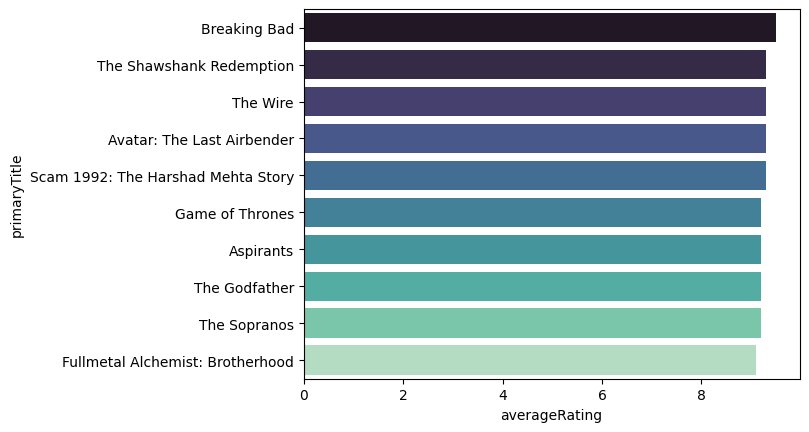

In [9]:
t_basic_sorted = t_basic.sort_values(by='averageRating', ascending=False)
top_filmes = t_basic_sorted.head(10)
sns.barplot(x = 'averageRating',y = 'primaryTitle', palette = 'mako',data = top_filmes)

#Quais são os filmes mais populares da plataforma?

<Axes: xlabel='numVotes', ylabel='primaryTitle'>

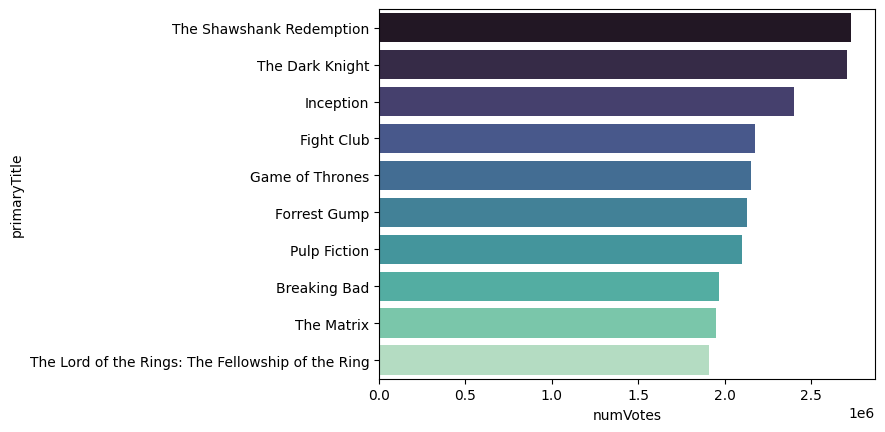

In [10]:
t_basic_sorted = t_basic.sort_values(by='numVotes', ascending=False)
top_filmes = t_basic_sorted.head(10)
sns.barplot(x = 'numVotes',y = 'primaryTitle', palette = 'mako',data = top_filmes)

#Quer descobrir a avaliação e popularidade para um determinado genero?

##Escolha entre estes generos apresentados:

Action, Adult, Adventure, Animation,

Biography, Comedy, Crime, Documentary,

Drama, Family, Fantasy, Film-Noir, Game-Show,

History, Horror, Music, Musical, Mystery,

News, Reality-TV, Romance, Sport,

Talk-Show, Thriller, War, Western,

Digite qual genênero você deseja conhecer os melhores filmes: comedy


<Axes: xlabel='averageRating', ylabel='primaryTitle'>

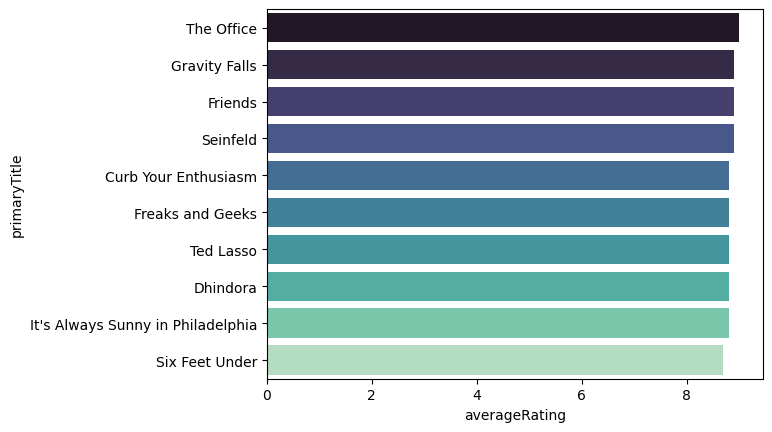

In [11]:
exibicao_melhores(t_basic)

Digite qual genênero você deseja conhecer os filmes mais populares: comedy


<Axes: xlabel='numVotes', ylabel='primaryTitle'>

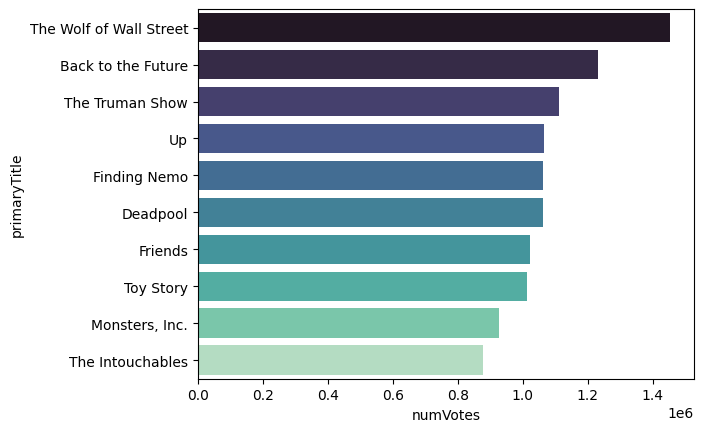

In [12]:
exibicao_populares(t_basic)

#Quais são os melhores diretores e atores/atrizes?

## Limpando name_basics

In [13]:
name_short = name_basics.drop(['deathYear'], axis = 1)
#name_short = name_short[name_short['primaryProfession'].isin(['director','actor', 'actress'])]
name_short[['primaryProfession1', 'primaryProfession2', 'primaryProfession3']] = name_short['primaryProfession'].str.split(',', expand=True)

In [14]:
# Crie uma função lambda que verifica se uma linha contém "actor", "actress" ou "director"
contains_profs = lambda row: any([prof in ['actor', 'actress', 'director'] for prof in row.values])

# Aplique a função lambda a cada linha do DataFrame para criar uma série booleana
contains_profs_series = name_short[['primaryProfession1', 'primaryProfession2', 'primaryProfession3']].apply(contains_profs, axis=1)

# Indexe o DataFrame usando a série booleana para remover as linhas que não contêm nenhum desses valores
name_short = name_short[contains_profs_series]

In [15]:
# Crie uma lista de condições e valores para cada condição usando a função numpy.select()
conditions = [
    (name_short['primaryProfession1'].isin(['actor', 'actress', 'director'])),
    (name_short['primaryProfession2'].isin(['actor', 'actress', 'director']) & ~name_short['primaryProfession1'].isin(['director'])),
    (name_short['primaryProfession3'].isin(['actor', 'actress', 'director']) & ~name_short['primaryProfession1'].isin(['director']) & ~name_short['primaryProfession2'].isin(['director']))
]
values = [
    name_short['primaryProfession1'],
    name_short['primaryProfession2'],
    name_short['primaryProfession3']
]

# Use a função numpy.select() para criar a nova coluna "primaryProfession"
name_short['primaryProfession'] = np.select(conditions, values, default=np.nan)
name_short = name_short.drop(['primaryProfession1', 'primaryProfession2', 'primaryProfession3'], axis=1)


In [16]:
name_short = name_short.dropna(subset=['knownForTitles'])
limpeza = name_short['knownForTitles'].isin(['\\N'])
name_short = name_short.drop(name_short[limpeza].index)

In [17]:
#name_short[['knownForTitles1', 'knownForTitles2', 'knownForTitles3','knownForTitles4','knownForTitles5','knownForTitles6']] = name_short['knownForTitles'].str.split(',', expand=True)
name_short[['knownForTitle1', 'knownForTitle2', 'knownForTitle3','knownForTitle4','knownForTitle5','knownForTitle6']] = name_short['knownForTitles'].str.split(',', expand=True)
name_short = name_short.drop(['knownForTitle5', 'knownForTitle6'], axis=1)


In [18]:
name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle1',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating1'})

name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle2',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating2'})

name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle3',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating3'})

name_short = pd.merge(name_short,t_basic[['averageRating']], left_on='knownForTitle4',right_on='tconst' )
name_short = name_short.rename(columns = { 'averageRating' : 'averageRating4'})


In [19]:
# name_short['maxColumn'] = name_short[['averageRating1', 'averageRating2', 'averageRating3', 'averageRating4']].idxmax(axis=1)
# name_short['maxColumn'] = name_short['maxColumn'].str[-1]

In [20]:
name_short['averageRating'] = name_short[['averageRating1', 'averageRating2', 'averageRating3', 'averageRating4']].apply(max, axis=1)
columns_to_drop = ['knownForTitle1', 'knownForTitle2', 'knownForTitle3', 'knownForTitle4',
                   'averageRating1', 'averageRating2', 'averageRating3', 'averageRating4']
name_short = name_short.drop(columns=columns_to_drop)
name_short.head()

,primaryName,birthYear,primaryProfession,knownForTitles,averageRating
0,Alfred Hitchcock,1899,director,"tt0040746,tt0052357,tt0053125,tt0054215",8.5
1,Marilyn Putnam,1925,actress,"tt0081398,tt0074958,tt0075686,tt0068646",9.2
2,Francis Ford Coppola,1939,director,"tt0071562,tt0071360,tt0078788,tt0068646",9.2
3,John Cazale,1935,actor,"tt0072890,tt0071562,tt0071360,tt0068646",9.2
4,Stanley Kubrick,1928,director,"tt0062622,tt0093058,tt0072684,tt0066921",8.3


##Quais são os atores, atrizes e diretores que estão nos filmes mais bem avaliados?

<Axes: xlabel='averageRating', ylabel='primaryName'>

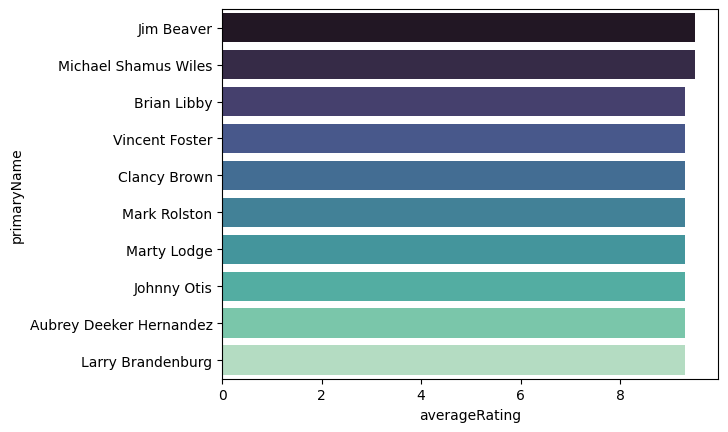

In [21]:
top_atores = name_short[name_short['primaryProfession'] == 'actor'].sort_values('averageRating',ascending = False).head(10)
sns.barplot(x = 'averageRating',y = 'primaryName', palette = 'mako',data = top_atores)

<Axes: xlabel='averageRating', ylabel='primaryName'>

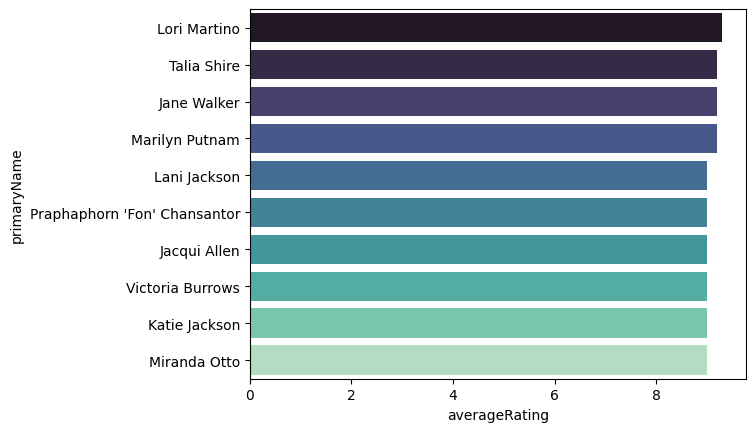

In [22]:
top_atores = name_short[name_short['primaryProfession'] == 'actress'].sort_values('averageRating',ascending = False).head(10)
sns.barplot(x = 'averageRating',y = 'primaryName', palette = 'mako',data = top_atores)

<Axes: xlabel='averageRating', ylabel='primaryName'>

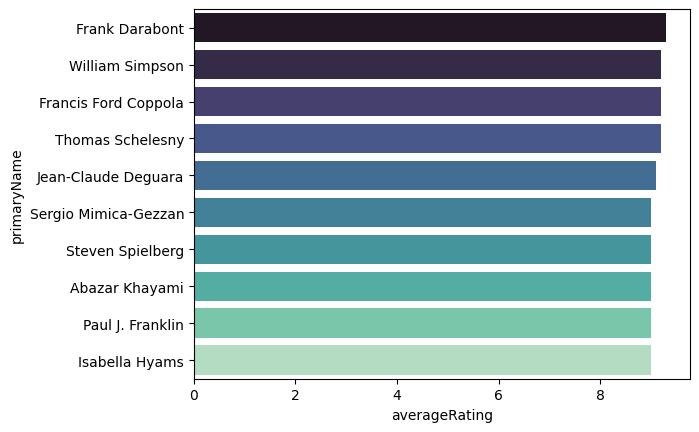

In [23]:
top_atores = name_short[name_short['primaryProfession'] == 'director'].sort_values('averageRating',ascending = False).head(10)
sns.barplot(x = 'averageRating',y = 'primaryName', palette = 'mako',data = top_atores)

#Limpando

##basics
  titleType:
    apenas filmes e series? curtas metragem,jogos?
    apenas seculo 21? todos os anos?
    inserir notas?

  originalTitle:
    apagar?

  isAdult:
    apagar?

  runtimeMinutes:
    apagar?

  genres:
    dividir em 3?
    apagar documentarios? mini series?

##crew
  join com nomes?

##ratings
  join com basics?

##name_basics
  apagar ano nascimento?
  ano de morte?
  oq fazer com titulos referencia?

#Perguntas
##1 Quais são os melhores filmes de cada gênero? qual genero mais cresceu ao longo dos anos?

##2 A guerra na ucrania afetou a quantidade de filmes de guerra?

##3 O sexo do ator interfere na nota ganhada? melhores atores? teste de hipotese

##4 